In [ ]:
pip install Afinn

In [1]:
import re
from afinn import Afinn            # Lexicon-based sentiment analyzer (gives integer sentiment scores)
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer  # Convert text to TF-IDF vectors
from sklearn.tree import DecisionTreeClassifier              # Simple baseline classifier
from sklearn.model_selection import train_test_split         # Split data into train/test sets
from sklearn.metrics import (
    accuracy_score, 
    classification_report, 
    f1_score, 
    precision_score,
    confusion_matrix
)                                                           # Evaluation metrics
from nltk.corpus import stopwords                           # Stopword list for text preprocessing


In [2]:
# Load collected comments from CSV file
df = pd.read_csv(r"...\comments.csv")

In [3]:
# Display first 5 rows to check the structure of the dataset
df.head()

,episode_index,episode_url,comment
0,1,https://www.webtoons.com/en/romance/the-mafia-...,TOP
1,1,https://www.webtoons.com/en/romance/the-mafia-...,TOP
2,1,https://www.webtoons.com/en/romance/the-mafia-...,TOP
3,1,https://www.webtoons.com/en/romance/the-mafia-...,it's confirmed. Nico and Alina are married now
4,1,https://www.webtoons.com/en/romance/the-mafia-...,TOP


In [4]:
# Check how many comments were collected
len(df)

8759

In [5]:
# Remove rows with missing values and create a clean copy
df = df.dropna().copy()

In [6]:
len(df)

8759

In [7]:
def preprocess_text(text):
    text = text.lower()                      # Convert text to lowercase
    text = re.sub(r'[^\w\s]', '', text)      # Remove punctuation and special characters
    return text                               # Return cleaned text

In [8]:
# Apply preprocessing to each comment and create a new column
df['cleaned_comment'] = df['comment'].apply(preprocess_text)

In [9]:
# Show original and cleaned comments side by side
df[['comment', 'cleaned_comment']]

,comment,cleaned_comment
0,TOP,top
1,TOP,top
2,TOP,top
3,it's confirmed. Nico and Alina are married now,its confirmed nico and alina are married now
4,TOP,top
...,...,...
8754,Now wtf is she needed for 🤬🤬🤬 get the f out,now wtf is she needed for get the f out
8755,Am the only one who thinks she is slay?,am the only one who thinks she is slay
8756,Ffffffffffffffffffuuuuuuuuuuuuuuuuuc- *gets su...,ffffffffffffffffffuuuuuuuuuuuuuuuuuc gets suck...
8757,I made the same face when saw her eugh,i made the same face when saw her eugh


In [10]:
# Remove rows where the cleaned comment is exactly 'top'
df2 = df[df['cleaned_comment'] != 'top']

In [11]:
# Display the filtered DataFrame
df2

,episode_index,episode_url,comment,cleaned_comment
3,1,https://www.webtoons.com/en/romance/the-mafia-...,it's confirmed. Nico and Alina are married now,its confirmed nico and alina are married now
7,1,https://www.webtoons.com/en/romance/the-mafia-...,Narratively I love this but personally I'm pis...,narratively i love this but personally im piss...
11,1,https://www.webtoons.com/en/romance/the-mafia-...,GO GET YOUR WIFE!!!!,go get your wife
12,1,https://www.webtoons.com/en/romance/the-mafia-...,Davina recognizes Breixo’s fighting style? Why...,davina recognizes breixos fighting style why d...
13,1,https://www.webtoons.com/en/romance/the-mafia-...,Nico potential love interest 😏😏😏🙄🙄🙄,nico potential love interest
...,...,...,...,...
8754,10,https://www.webtoons.com/en/romance/the-mafia-...,Now wtf is she needed for 🤬🤬🤬 get the f out,now wtf is she needed for get the f out
8755,10,https://www.webtoons.com/en/romance/the-mafia-...,Am the only one who thinks she is slay?,am the only one who thinks she is slay
8756,10,https://www.webtoons.com/en/romance/the-mafia-...,Ffffffffffffffffffuuuuuuuuuuuuuuuuuc- *gets su...,ffffffffffffffffffuuuuuuuuuuuuuuuuuc gets suck...
8757,10,https://www.webtoons.com/en/romance/the-mafia-...,I made the same face when saw her eugh,i made the same face when saw her eugh


In [12]:
# Select only comments from episode 1 and create a copy
df3 = df2[df2['episode_index'] == 1].copy()

In [13]:
# Initialize Afinn sentiment analyzer (returns integer sentiment scores)
afinn = Afinn()

In [14]:
# Compute Afinn sentiment score for each original comment
df3['sentiment_score'] = df3['comment'].apply(afinn.score)

In [15]:
# Display sentiment scores for episode 1 comments
df3['sentiment_score']

3      0.0
7     -1.0
11     0.0
12     1.0
13     4.0
      ... 
645   -4.0
646    2.0
647    0.0
648    0.0
649    4.0
Name: sentiment_score, Length: 641, dtype: float64

In [17]:
# Convert sentiment score into simple labels: positive or negative
df3['sentiment_label'] = df3['sentiment_score'].apply(
    lambda x: 'positive' if x > 0 else 'negative'
)

In [18]:
# Count how many comments are positive vs. negative
df3.groupby('sentiment_label').count()

,episode_index,episode_url,comment,cleaned_comment,sentiment_score
sentiment_label,,,,,
negative,466,466,466,466,466
positive,175,175,175,175,175


In [19]:
stop_words = stopwords.words('english')             # Load English stopwords

# TF-IDF vectorization
vectorizer = TfidfVectorizer(stop_words=stop_words) # Convert text to TF-IDF vectors
X = vectorizer.fit_transform(df3['cleaned_comment'])# Transform cleaned comments
y = df3['sentiment_label']                          # Target labels (positive/negative)

In [20]:
# Split data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [21]:
# Train a Decision Tree classifier with a max depth of 100
clf = DecisionTreeClassifier(max_depth=100, random_state=42)
clf.fit(X_train, y_train)    # Fit model on training data

DecisionTreeClassifier(max_depth=100, random_state=42)

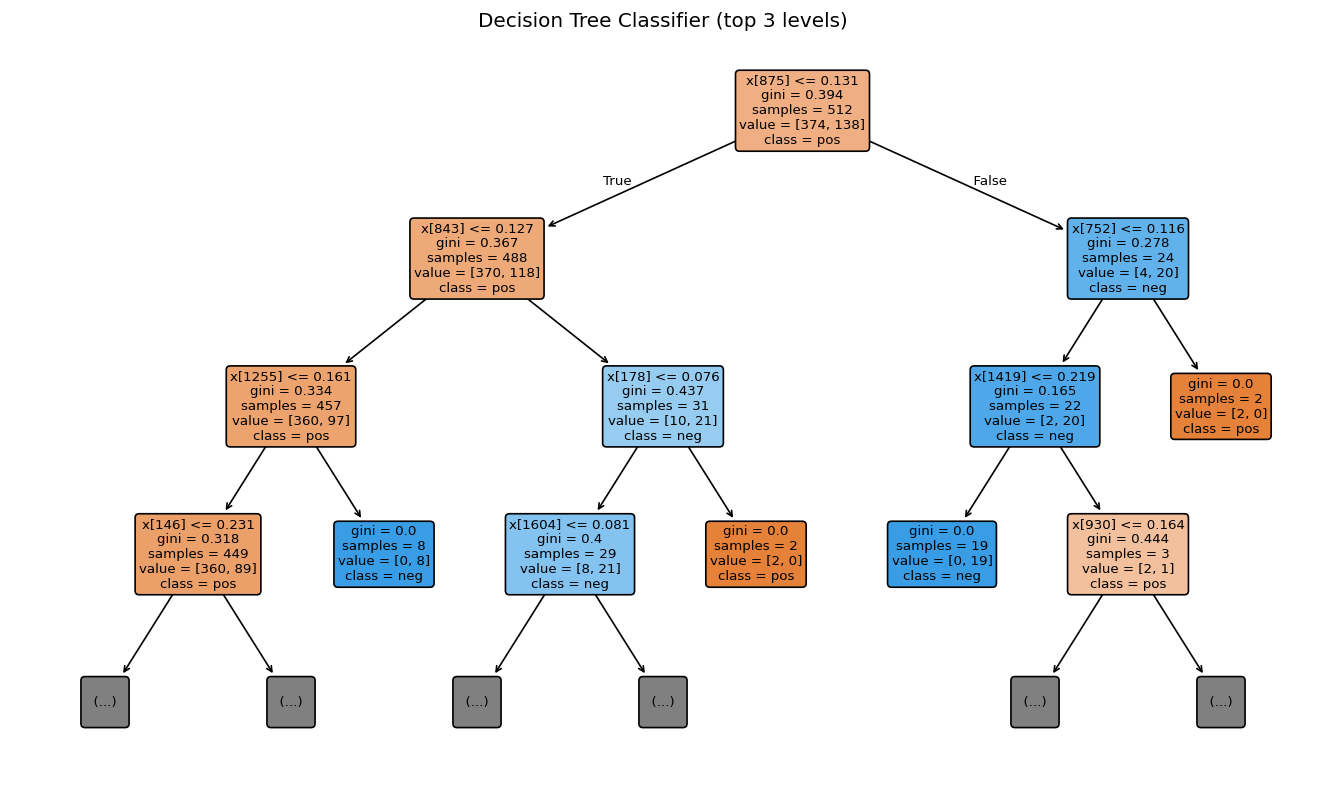

In [22]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(14, 8), dpi=120)     # Set figure size and resolution

plot_tree(
    clf,
    class_names=['pos', 'neg'],          # Names for the two classes
    filled=True,                         # Color nodes based on class
    rounded=True,                        # Rounded node boxes
    max_depth=3,                         # Visualize only first 3 levels of the tree
    fontsize=8                           # Font size inside the tree
)

plt.title("Decision Tree Classifier (top 3 levels)")  # Title of the plot
plt.show()                                            # Display the tree

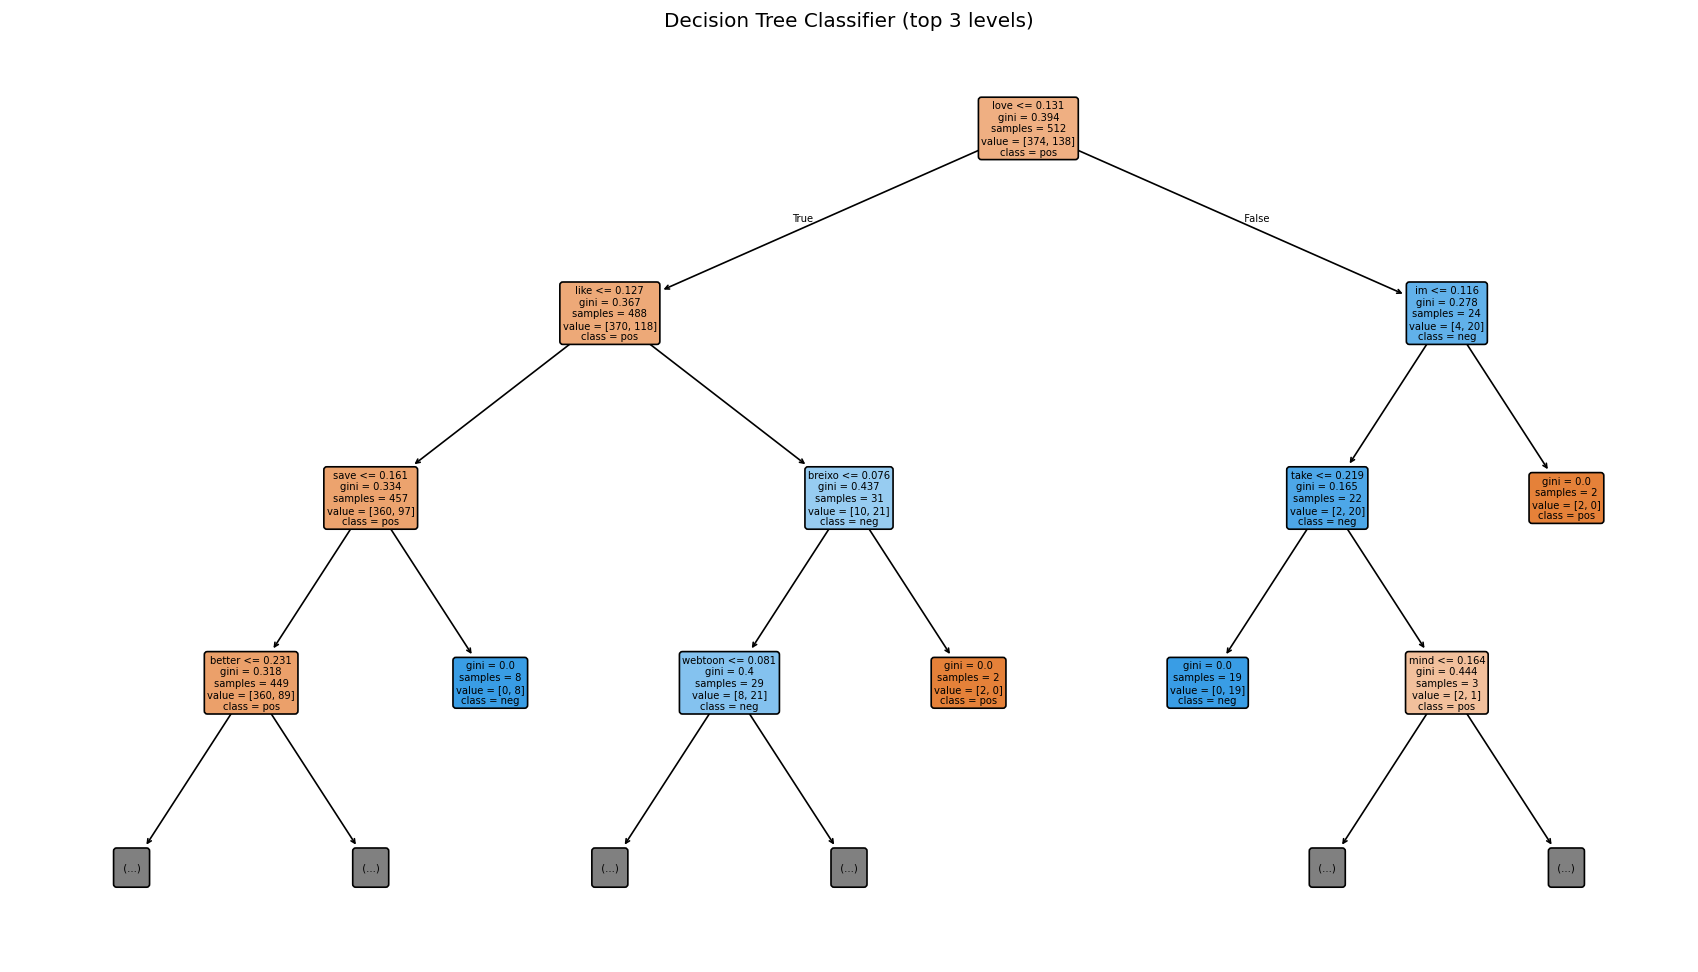

In [24]:
# Get TF-IDF feature names
feature_names = vectorizer.get_feature_names_out()

plt.figure(figsize=(18, 10), dpi=120)

plot_tree(
    clf,
    feature_names=feature_names,   # <-- Use TF-IDF feature names
    class_names=['pos', 'neg'],
    filled=True,
    rounded=True,
    max_depth=3,
    fontsize=6                   # smaller font for long feature names
)

plt.title("Decision Tree Classifier (top 3 levels)")
plt.show()


In [22]:
# Predict sentiment labels for the test set
y_pred = clf.predict(X_test)

# Print evaluation metrics
print("Accuracy:", accuracy_score(y_test, y_pred))           # Overall accuracy
print("Classification Report:\n", classification_report(y_test, y_pred))  # Precision, recall, F1

Accuracy: 0.7906976744186046
Classification Report:
               precision    recall  f1-score   support

    negative       0.83      0.89      0.86        92
    positive       0.67      0.54      0.60        37

    accuracy                           0.79       129
   macro avg       0.75      0.72      0.73       129
weighted avg       0.78      0.79      0.78       129



# Classification Metrics Explanation

## Precision
How many of the predicted positive (or negative) labels were actually correct.  
It measures the **correctness** of the model’s positive predictions.

## Recall
How many of the actual positive (or negative) samples the model successfully found.  
It measures the model’s **ability to capture** all true cases.

## F1-score
The harmonic balance of precision and recall.  
Used when we need a single score representing both **accuracy of predictions** and **coverage of true cases**.

## Support
The number of actual samples belonging to each class in the dataset.  
Shows **class distribution**.

## Accuracy
The overall proportion of correct predictions out of all predictions.  
Simple measure of **total correctness**.

## Macro Average
An average of precision/recall/F1 **treating all classes equally**, regardless of class size.  
Useful when classes are imbalanced.

## Weighted Average
An average of precision/recall/F1 **weighted by the number of samples in each class**.  
Reflects overall performance with respect to **class imbalance**.


In [23]:
# Display confusion matrix (true vs predicted labels)
confusion_matrix(y_test, y_pred)

array([[82, 10],
       [17, 20]], dtype=int64)

In [24]:
# Show the true sentiment labels in the test set
y_test

95     negative
313    positive
443    positive
321    negative
81     positive
         ...   
437    negative
185    negative
603    negative
630    negative
336    positive
Name: sentiment_label, Length: 129, dtype: object

In [25]:
# Show model predictions for the test set
y_pred

array(['negative', 'positive', 'positive', 'negative', 'positive',
       'negative', 'negative', 'negative', 'negative', 'negative',
       'negative', 'positive', 'negative', 'negative', 'negative',
       'negative', 'negative', 'negative', 'negative', 'negative',
       'negative', 'negative', 'negative', 'negative', 'negative',
       'positive', 'negative', 'negative', 'negative', 'positive',
       'negative', 'negative', 'negative', 'negative', 'negative',
       'negative', 'positive', 'negative', 'positive', 'negative',
       'negative', 'negative', 'positive', 'negative', 'negative',
       'negative', 'negative', 'positive', 'positive', 'negative',
       'negative', 'negative', 'positive', 'positive', 'negative',
       'negative', 'negative', 'negative', 'negative', 'negative',
       'negative', 'negative', 'positive', 'negative', 'negative',
       'negative', 'negative', 'negative', 'negative', 'negative',
       'negative', 'positive', 'negative', 'negative', 'negati

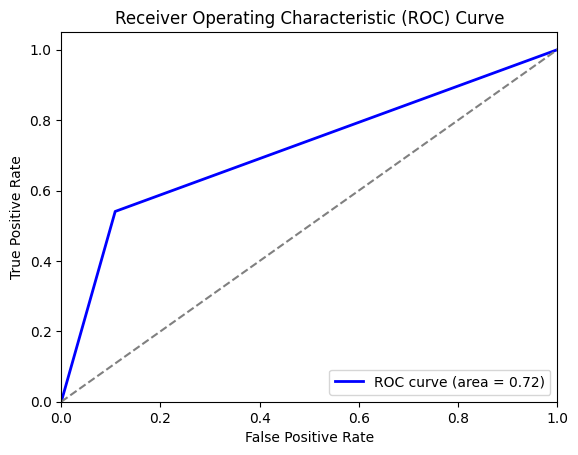

In [26]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
 
y_proba = clf.predict_proba(X_test)[:, 1]            # Predicted probability for positive class

# Convert labels (positive → 1, negative → 0)
y_test_numeric = pd.Series(y_test).map({'positive': 1, 'negative': 0})

# Compute ROC curve values
fpr, tpr, thresholds = roc_curve(y_test_numeric, y_proba)
roc_auc = auc(fpr, tpr)                              # Compute AUC

plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, 
         label=f'ROC curve (area = {roc_auc:.2f})')  # ROC curve line

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Baseline diagonal

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')                    # X-axis label
plt.ylabel('True Positive Rate')                     # Y-axis label
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")                         # Place legend

plt.show()                                            # Display plot

- X-axis (False Positive Rate, FPR): Proportion of negative samples incorrectly predicted as positive.
- Y-axis (True Positive Rate, TPR): Proportion of positive samples correctly predicted as positive (Recall).

- Blue line: Your model’s performance at different thresholds.
- Gray dashed line: Random guessing baseline.

AUC = 0.72: Indicates moderate performance (better than random, not very strong).